# Bivariate Copulas 

## General Introduction to Copulas



## Cumulative Distribution Function (CDF)

## Probability Density Function (PDF)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('C:/Users/jcl202/Documents/Phd/Data_exploration/Copulas/')
import vinecopulas3 as func
from matplotlib import cm

In [2]:
datapath = r'C:\Users\jcl202\Documents\Phd\Data_exploration\Copulas\sample_data.csv'
df = pd.read_csv(datapath)
df.head()

,whole,shuck,vis,shell,diameter,length
0,0.6770,0.2565,0.1415,0.21,0.420,0.530
1,0.7775,0.2370,0.1415,0.33,0.415,0.530
2,0.7680,0.2940,0.1495,0.26,0.425,0.545
3,0.8945,0.3145,0.1510,0.32,0.440,0.550
4,0.6065,0.1940,0.1475,0.21,0.380,0.525


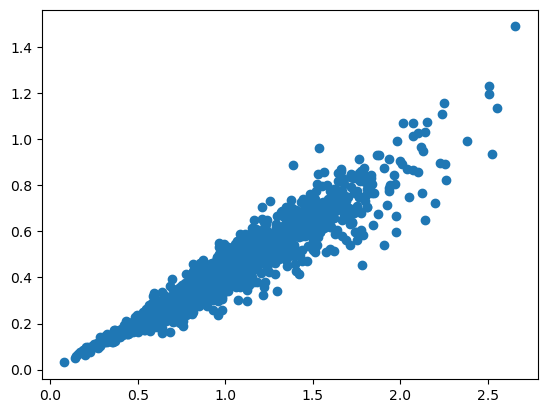

In [3]:
plt.scatter(df.whole, df.shuck)

In [4]:
x = np.array(df)
u =  func.pseudodata(x[:,:2])
u1 = u[:,0]
u2 = u[:,1]

the available copula types and their ID

| ID | Copula              |
|----|---------------------|
| 1  | Gaussian            |
| 2  | Gumbel              |
| 3  | Gumbel 90 degrees   |
| 4  | Gumbel 180 degrees  |
| 5  | Gumbel 270 degrees  |
| 6  | Clayton             |
| 7  |  Clayton 90 degrees |
| 8  | Clayton 180 degrees |
| 9  | Clayton 270 degrees |
| 10 | Frank               |
| 11 | Joe                 |
| 12 | Joe 90 degrees      |
| 13 | Joe 180 degrees     |
| 14 | Joe 270 degrees     |
| 15 | Student             |

In [5]:
cops = list(range(1,16))
cop, par, AIC = func.bestcop(cops, u) #fit best copula
func.copulas[cop] #best copula

'Gumbel180'

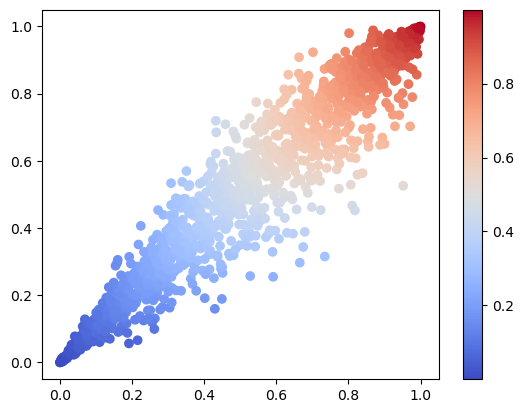

In [6]:
y = func.CDF(cop, u, par) #CDF
plt.scatter(u1, u2, c=y, cmap=cm.coolwarm)
plt.colorbar()
plt.show()

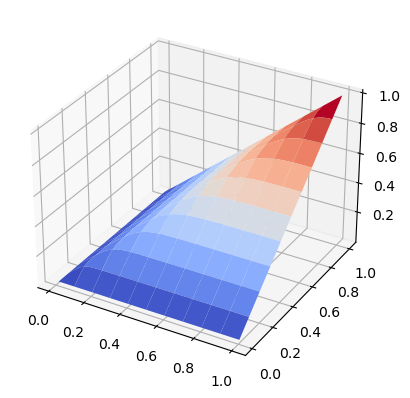

In [7]:

U1, U2 =  np.meshgrid(u1, u2)
x1 = 1 - np.arange(0,1,0.01)
y1 =  1 - np.arange(0,1,0.01)
X,Y = np.meshgrid(x1,y1)
z = func.CDF(cop, np.vstack((X.flatten(), Y.flatten())).T, par)
Z = np.resize(z,X.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)

plt.show()

In [8]:
p =  func.PDF(cop, u, par) #PDF
p

array([6.43481561, 0.86226783, 5.68367378, ..., 3.69354582, 4.7430459 ,
       1.65446006])

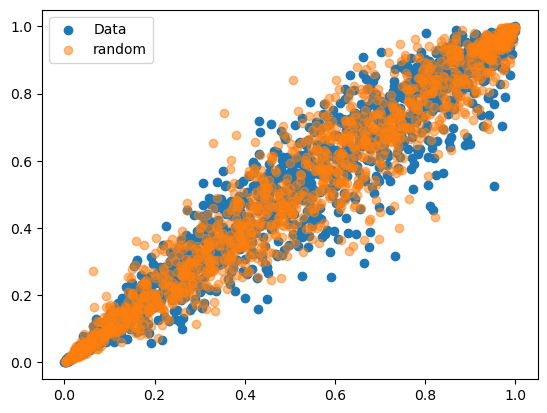

In [9]:
#generate random samples
n = len(u)
ur = func.random(cop, par, n)
plt.scatter(u1,u2, label = 'Data')
plt.scatter(ur[:,0], ur[:,1], alpha = 0.5, label = 'random')
plt.legend()

In [10]:
#hfunctions
c2g1 = func.hfunc(cop, u1, u2, par, un = 1)
c1g2 = func.hfunc(cop, u1, u2, par, un = 2)


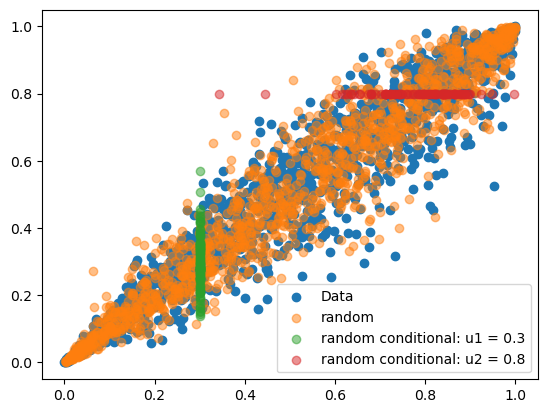

In [11]:
#generate conditional samples
n =  100
ui1 = 0.3
uii2 = func.randomconditional(cop, ui1, par, n, un = 1)
ui2 = 0.8
uii1 = func.randomconditional(cop, ui2, par, n, un = 2)
plt.scatter(u1,u2, label = 'Data')
plt.scatter(ur[:,0], ur[:,1], alpha = 0.5, label = 'random')
plt.scatter(np.full(shape = n, fill_value = ui1), uii2, alpha = 0.5, label = 'random conditional: u1 = 0.3')
plt.scatter( uii1,np.full(shape = n, fill_value = ui2), alpha = 0.5, label = 'random conditional: u2 = 0.8')
plt.legend()

In [12]:
#Fit marginal distributions
x1dist = func.best_fit_distribution(x[:,0])
x2dist = func.best_fit_distribution(x[:,1])

In [13]:
u = x[:,:2].copy()
u[:,0] = x1dist[0].cdf(u[:,0] , *x1dist[1])
u[:,1] = x2dist[0].cdf(u[:,1] , *x2dist[1])
par = func.fit(cop, u)
#cop, par, AIC = func.bestcop(cops, u)
#func.copulas[cop]

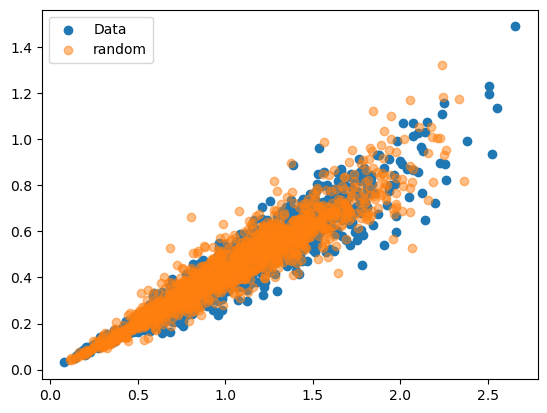

In [14]:
n = len(u)
ur = func.random(cop, par, n)
x1i = x1dist[0].ppf(ur[:,0] , *x1dist[1])
x2i = x2dist[0].ppf(ur[:,1] , *x2dist[1])
plt.scatter(x[:,0],x[:,1], label = 'Data')
plt.scatter(x1i,x2i, alpha = 0.5, label = 'random')
plt.legend()